In [9]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

DATASET_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"

classes = [
    d for d in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, d))
]

print("Classes found:", classes)
print("Number of classes:", len(classes))



Classes found: ['planet', 'galaxy', 'black hole', 'asteroid', 'comet', 'star', 'constellation', 'nebula']
Number of classes: 8


In [ ]:

DATASET_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"

class_counts = {}

for cls in classes:  
    cls_path = os.path.join(DATASET_PATH, cls)
    class_counts[cls] = len([
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
    ])

class_counts


{'planet': 1472,
 'galaxy': 3984,
 'black hole': 656,
 'asteroid': 283,
 'comet': 416,
 'star': 3269,
 'constellation': 1552,
 'nebula': 1192}

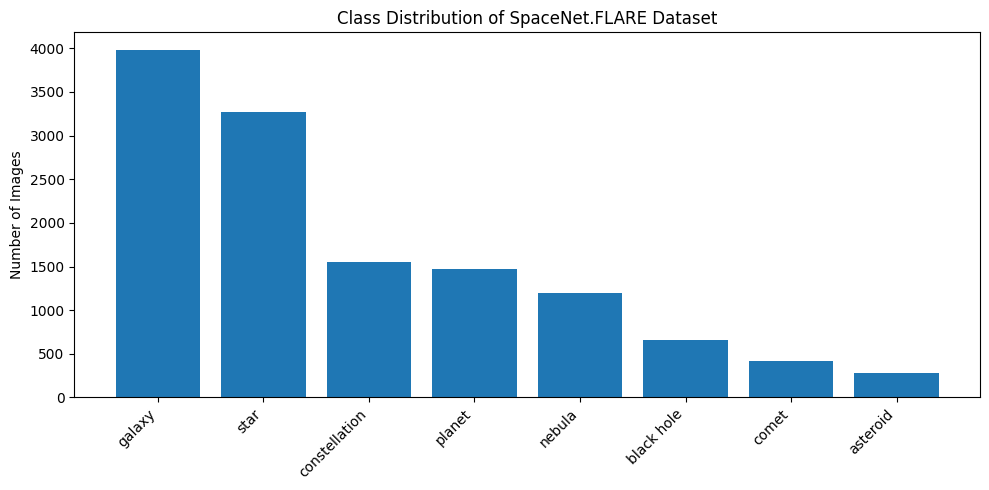

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(
    class_counts, orient="index", columns=["num_samples"]
).sort_values("num_samples", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(df.index, df["num_samples"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Images")
plt.title("Class Distribution of SpaceNet.FLARE Dataset")
plt.tight_layout()
plt.show()


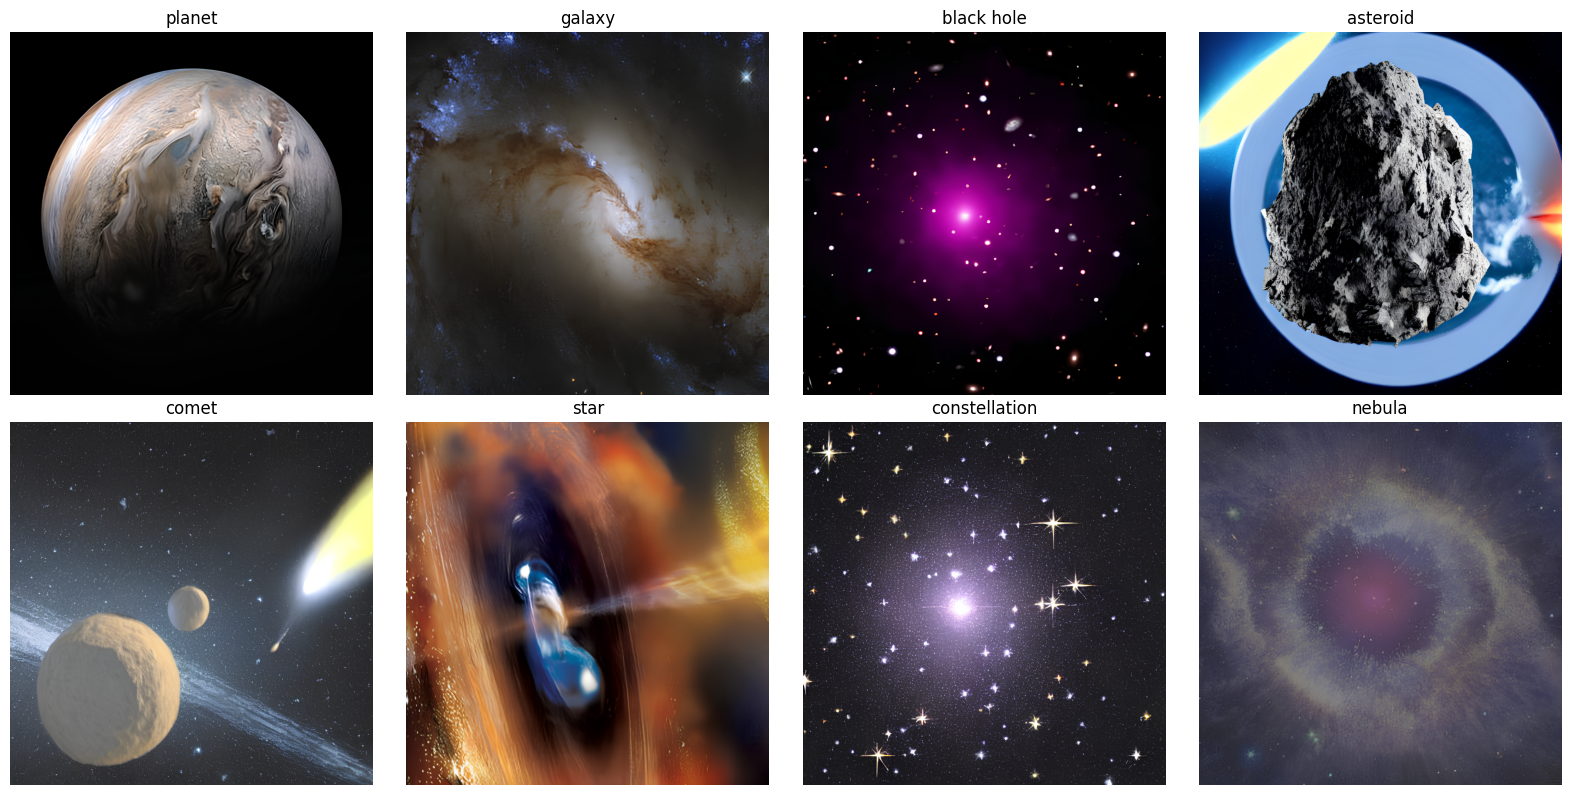

In [15]:
import random
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

for i, cls in enumerate(classes):
    cls_path = os.path.join(DATASET_PATH, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)
    
    img = Image.open(img_path)
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()



In [18]:
import os
import numpy as np
from PIL import Image
from collections import Counter

resolutions = []
formats = []

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        try:
            with Image.open(img_path) as img:
                resolutions.append(img.size)   
                formats.append(img.format)
        except:
            pass

widths, heights = zip(*resolutions)

print("Minimum resolution:", min(widths), "x", min(heights))
print("Maximum resolution:", max(widths), "x", max(heights))
print("Average resolution:", int(np.mean(widths)), "x", int(np.mean(heights)))

print("\nImage format distribution:")
print(Counter(formats))


Minimum resolution: 2048 x 2048
Maximum resolution: 2048 x 2048
Average resolution: 2048 x 2048

Image format distribution:
Counter({'PNG': 11448})
